In [1]:
#from collections import deque
import matplotlib.pyplot as plt
#from matplotlib import dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    dt_first = df.index[0]
    d = str(dt_first.date())

    dt_noon1 = pd.to_datetime('%s 11:30:00+09:00' % d)
    print(dt_noon1)

    dt_noon2 = pd.to_datetime('%s 12:30:00+09:00' % d)
    print(dt_noon2)

    dt_end = pd.to_datetime('%s 15:24:00+09:00' % d)
    print(dt_end)

    df1 = df[df.index <= dt_noon1].copy()
    df2 = df[(df.index >= dt_noon2) & (df.index <= dt_end)].copy()
    return pd.concat([df1, df2])[['Open', 'High', 'Low', 'Close']]

In [11]:
symbol = '8306.T'
ticker = yf.Ticker(symbol)
df0 = ticker.history(period='1d', interval='5m')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-09 09:00:00+09:00,1812.0,1821.5,1812.0,1812.5,1782200,0.0,0.0
2024-12-09 09:05:00+09:00,1812.5,1813.0,1804.0,1805.5,1551900,0.0,0.0
2024-12-09 09:10:00+09:00,1805.5,1809.0,1799.0,1800.5,2176200,0.0,0.0
2024-12-09 09:15:00+09:00,1800.0,1802.0,1796.0,1798.0,1260600,0.0,0.0
2024-12-09 09:20:00+09:00,1798.0,1800.5,1792.0,1792.0,1548700,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 15:00:00+09:00,1810.0,1811.0,1809.5,1811.0,309200,0.0,0.0
2024-12-09 15:05:00+09:00,1811.0,1811.5,1810.5,1811.5,230700,0.0,0.0
2024-12-09 15:10:00+09:00,1811.5,1811.5,1810.5,1811.0,267300,0.0,0.0


In [12]:
df = get_dataframe(df0)
df

2024-12-09 11:30:00+09:00
2024-12-09 12:30:00+09:00
2024-12-09 15:24:00+09:00


,Open,High,Low,Close
Datetime,,,,
2024-12-09 09:00:00+09:00,1812.0,1821.5,1812.0,1812.5
2024-12-09 09:05:00+09:00,1812.5,1813.0,1804.0,1805.5
2024-12-09 09:10:00+09:00,1805.5,1809.0,1799.0,1800.5
2024-12-09 09:15:00+09:00,1800.0,1802.0,1796.0,1798.0
2024-12-09 09:20:00+09:00,1798.0,1800.5,1792.0,1792.0
...,...,...,...,...
2024-12-09 15:00:00+09:00,1810.0,1811.0,1809.5,1811.0
2024-12-09 15:05:00+09:00,1811.0,1811.5,1810.5,1811.5
2024-12-09 15:10:00+09:00,1811.5,1811.5,1810.5,1811.0


In [20]:
def get_chart_title(ticker, symbol, ctype):
    try:
        title = '%s (%s)\n%s' % (ticker.info['longName'], symbol, ctype)
    except KeyError:
        title = '%s\n%s' % (symbol, ctype)
    return title

In [56]:
def gen_chart(df, title):
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        xrotation=0,
        ax=ax
    )
    ax.set_title(title)
    ax.grid()
    
    plt.tight_layout()
    plt.savefig('output.png')
    plt.show()

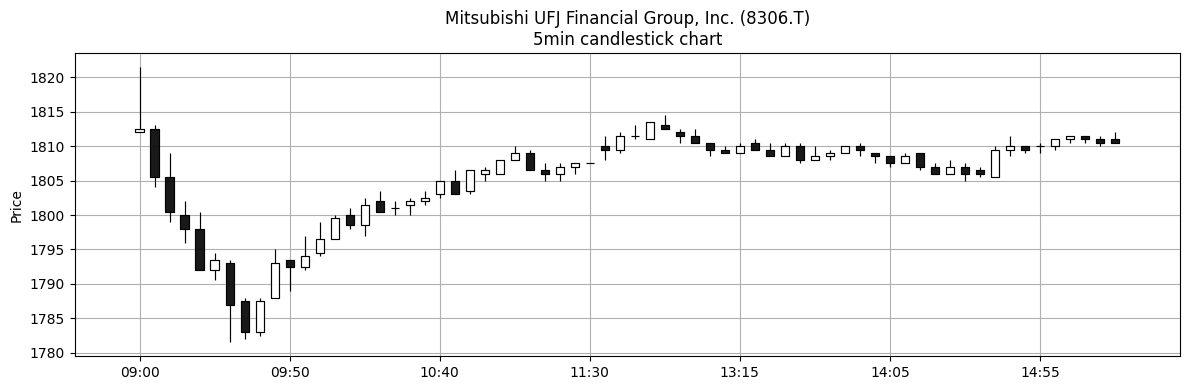

In [62]:
ctype = '5min candlestick chart'
gen_chart(df, get_chart_title(ticker, symbol, ctype))

In [63]:
df_mean = df.copy()
for col in df.columns:
    df_mean[col] = np.nan
df_mean

,Open,High,Low,Close
Datetime,,,,
2024-12-09 09:00:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 09:05:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 09:10:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 09:15:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 09:20:00+09:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-09 15:00:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 15:05:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 15:10:00+09:00,NaN,NaN,NaN,NaN


In [64]:
for i, dt in enumerate(df.index):
    # 1st row
    if i == 0:
        continue

    # Open
    if i == 1:
        p_open = df.iloc[0].mean()
    else:
        p_open = df.iloc[i - 1][['Open', 'Close']].mean()
    # High
    p_high = max(p_open, df.iloc[i]['High'])
    # Low
    p_low = min(p_open, df.iloc[i]['Low'])
    # Close
    p_close = df.iloc[i].mean()

    df_mean.iloc[i] = [p_open, p_high, p_low, p_close]
df_mean

,Open,High,Low,Close
Datetime,,,,
2024-12-09 09:00:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 09:05:00+09:00,1814.50,1814.5,1804.0,1808.750
2024-12-09 09:10:00+09:00,1809.00,1809.0,1799.0,1803.500
2024-12-09 09:15:00+09:00,1803.00,1803.0,1796.0,1799.000
2024-12-09 09:20:00+09:00,1799.00,1800.5,1792.0,1795.625
...,...,...,...,...
2024-12-09 15:00:00+09:00,1810.00,1811.0,1809.5,1810.375
2024-12-09 15:05:00+09:00,1810.50,1811.5,1810.5,1811.125
2024-12-09 15:10:00+09:00,1811.25,1811.5,1810.5,1811.125


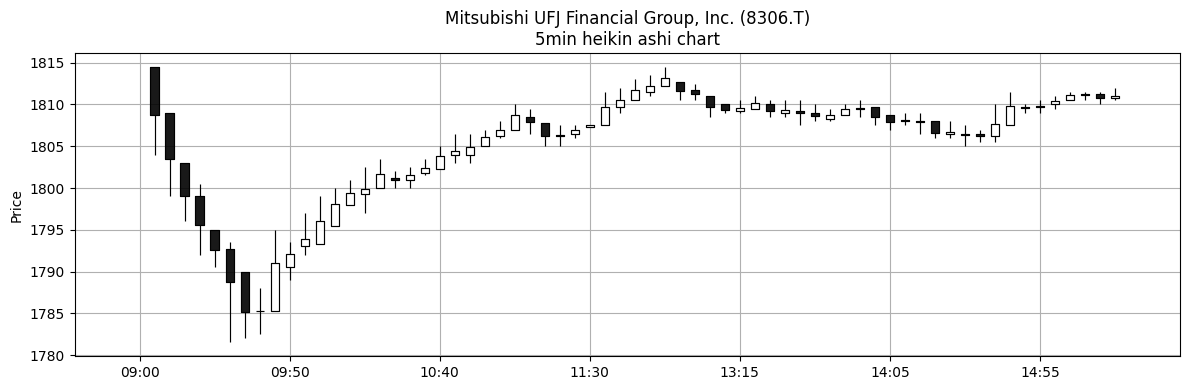

In [65]:
ctype = '5min heikin ashi chart'
gen_chart(df_mean, get_chart_title(ticker, symbol, ctype))